# Minimization and Fitting

## Scipy

[SciPy](https://scipy.github.io/devdocs/index.html) is the most famous library for complex scientific and technical operations

It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

Alcuni moduli contenuti in Scipy:

- `constants`: physical constants and conversion factors
- `optimize`: optimization algorithms, roots, minimisation, fitting
- `interpolate`: interpolation tools 
- `stats`: statistical functions and tests
- `integrate`: numerical integration
- `fft` and `fftpack`: Discrete Fourier Transform algorithms
- `linalg`: linear algebra
- `sparse`: sparse matrices and related algorithms

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

##  Roots of functions

Root finding algorithms for a function $f(x): {\rm I\!R} \to {\rm I\!R}$ -> [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) or Brent

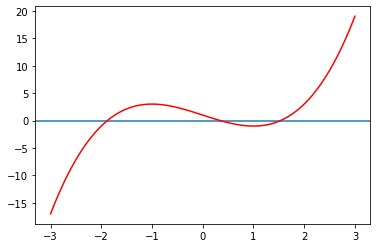

In [13]:
def f(x):
    return x**3-3*x+1

x = np.linspace(-3, 3, 100)
plt.axhline(0)
plt.plot(x, f(x),'r-')

In [4]:
from scipy.optimize import newton
x1, x2, x3 = newton(f, -3), newton(f, 0), newton(f, 3) #Funzione e valore iniziale da cui cercare
print(x1, x2, x3)

-1.8793852415718166 0.34729635533385395 1.5320888862379578


Let's try now the [Brentq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) module from ScipPy:

In [8]:
from scipy.optimize import brentq
x1, x2, x3 = brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1,3) #Funzione e range entro cui cercare
print(x1, x2, x3)

-1.8793852415718166 0.3472963553337031 1.532088886237956


In [14]:
%timeit brentq(f, 0, 1)
%timeit newton(f, 0)

4.81 µs ± 93.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
230 µs ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


To find the root of multidimensional function $f(x): {\rm I\!R}^n \to {\rm I\!R}^m$ -> `optimize.root`

When performing complex root finding and minimizations, always **check if the algorithm has converged!**

In [21]:
from scipy.optimize import root, fsolve

def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1), .25*x[0]**2 + x[1]**2 - 1]

solutions = root(f, (0.5, 0.5)) #function and initial values

# optimize.root returns an object. Results are in ['x'] component
print(solutions)
print("\n\nRoots of f(x):\nx0 =", solutions['x'], "\nf(x0) =", f(solutions['x']), '~ [0,0]')

    fjac: array([[-0.99782686,  0.06589046],
       [-0.06589046, -0.99782686]])
     fun: array([-1.63602465e-12,  1.61870517e-12])
 message: 'The solution converged.'
    nfev: 21
     qtf: array([-1.49465503e-08,  1.27017698e-08])
       r: array([ 8.22949362, -0.88256935, -1.72647892])
  status: 1
 success: True
       x: array([1.11694147, 0.82952422])


Roots of f(x):
x0 = [1.11694147 0.82952422] 
f(x0) = [-1.6360246490876307e-12, 1.6187051699034782e-12] ~ [0,0]


[Algorithm results format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult).

## Minimization of a function

Scipy has a different algorithms for minimization of a function.

`minimize_scalar` finds the minimum for a given interval. By default, it uses the Brent algorithm.


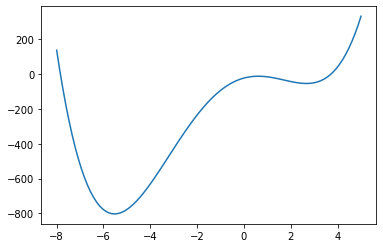

In [39]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

x = np.linspace(-8, 5, 100)
plt.plot(x, f(x))

In [40]:
solution = optimize.minimize_scalar(f, method='Brent')
print(solution) # nit: number of iteration

     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663


In [30]:
solution = optimize.minimize_scalar(f, method='bounded', bounds=[0, 6]) #funzione e range dove cercare il min
print(solution)

     fun: -54.21003937712762
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 2.668865104039653


#### Local and global minima

If the function is not trivial (and especially if it is in higher dimensions than 1), it may contain several minima. In these cases, care has to be taken to specify a good starting point, otherwise the algorithm will converge in a local (false) minimum.

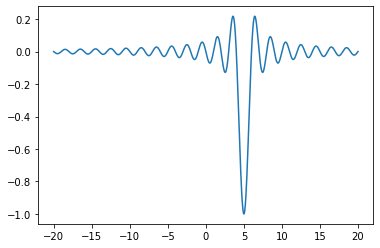

In [63]:
def f(x, offset):
    return -np.sinc(x - offset)

x = np.linspace(-20, 20, 1000)
plt.plot(x, f(x, 5))

     fun: -0.049029624014074166
    nfev: 15
     nit: 10
 success: True
       x: -1.4843871263953001


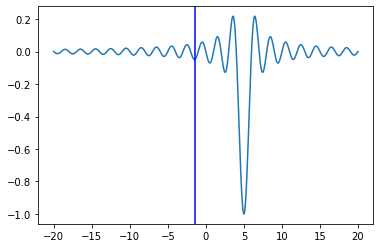

In [75]:
#Wrong minimum
solution = optimize.minimize_scalar(f, args=(5,)) #args to pass arguments to f
print(solution)

plt.plot(x, f(x, 5))
plt.axvline(solution['x'], color='b')

To get the minimum: split the x range in intervals, and run minimize_scalar in each one, then pick the interval with the smallest minimum. Manually

     fun: -1.0
    nfev: 12
     nit: 8
 success: True
       x: 5.000000000023822


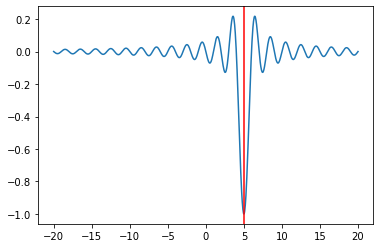

In [66]:
lower = np.random.uniform(-20, 20, 100) #Generate random slices of the domain
upper = lower + 1

solutions = [optimize.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)] #array of results object
idx = np.argmin([solution.fun for solution in solutions]) #index of minimum result

solution = solutions[idx]

plt.plot(x, f(x, 5))
plt.axvline(solution['x'], color='r')
print(solution)

Absolute minimum with `basinhopping`

                        fun: -1.0
 lowest_optimization_result:       fun: -1.0
 hess_inv: array([[0.3039813]])
      jac: array([2.23517418e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([5.])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1268
                        nit: 100
                       njev: 634
                          x: array([5.])


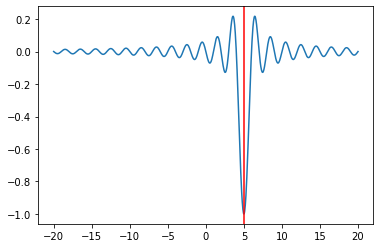

In [74]:
from scipy.optimize import basinhopping

x0 = -10 #starting point
solution = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (5,)}) #passign argument to f with kwargs
print(solution)

plt.plot(x, f(x, 5))
plt.axvline(solution['x'], color='r')

## Interpolation

Interpolating datas = finding intermediate point. It's not a fit.

`scipy.interpolate`, module is based on the FITPACK Fortran subroutines.

The kind of interpolation can be specified: linear is the default;  *zero*, *slinear*, *quadratic* and *cubic* refer to a [spline](https://en.wikipedia.org/wiki/Spline_(mathematics)) interpolation of zeroth, first, second or third order; *previous* and *next* simply return the previous or next value of the point.

sin( 0.2 ): 0.9510565162951535 
 linear prediction: 0.8762697765609316 
 cubic prediction: 0.9078575644917783


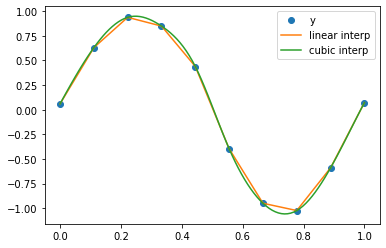

In [80]:
#dataset
x = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1.e-1
y = np.sin(2 * np.pi * x) + noise

# 1D linear and cubic interpolation function
from scipy.interpolate import interp1d
linear_interp = interp1d(x, y)
cubic_interp = interp1d(x, y, kind='cubic')

grid = np.linspace(0, 1, 100) #denser grid to evaluate the interpolation
linear_results = linear_interp(grid)
cubic_results = cubic_interp(grid)

#Plotting
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o', ms=6, label='y')
plt.plot(grid, linear_results, label='linear interp')
plt.plot(grid, cubic_results, label='cubic interp')
plt.legend()


x = 0.2
print("sin(", x, "):", np.sin(2 * np.pi * x), "\n",
       "linear prediction:",linear_interp(x), "\n",
       "cubic prediction:", cubic_interp(x))

## Linear Regression

We have some data, $x$ and $y$, and we suppose there is a linear relation between them.
Thus, we want to fit a line to the data. Our model will be:

$$\hat{y} = \hat{\alpha} + \hat{\beta}x$$

where the symbol $\hat{}$ indicates our best estimate of that parameter.

For the sake of clarity, we define the following symbols:

* $\alpha$: the intercept
* $\hat{\alpha}$: our estimated best intercept
* $\beta$: the slope
* $\hat{\beta}$: our estimated best slope
* $\hat{y}$: our estimated y's, or in other words $f(x, \hat{\alpha}, \hat{\beta})$
* $x,y$: the data
* $\bar{x}$, $\bar{y}$: the average of $x,y$
* Residual: the difference between $\hat{y}$ and $y$ at a particular point ($\hat{y}_i - y_i$)
* Sum of squared residues (SSR): $\sum_i (\hat{y}_i - y_i)^2$
* Total sum of squares (TSS): $\sum_i (\bar{y} - y_i)^2$, which is a kind of variance

One way to view this problem is as a minimization. Specifically, we want to have a function that returns a value of how good the estimate of our parameters is. As a matter of fact, our ultimate goal is to make $\hat{y}$ as close as possible to $y$. One of the most immediate choices is to take $\sum_i(\hat{y}_i - y_i)^2$, and minimize the resulting quantity. 
So we need to write down a function which takes in $\hat{\alpha}$ and $\hat{\beta}$ and returns how good the fit is:

$$f(\hat{\alpha}, \hat{\beta}) = \sum_i \left(y_i - \hat{\alpha} - \hat{\beta} x_i\right)^2$$

We can minimize this equation respect $\alpha$ and $\beta$ using any of our minimization techniques or we can do it analytically. In case of a linear regression, this can be easily done analytically.

Using calculus you can show that the minimum to $f(\alpha, \beta)$ is:

$$\hat{\beta} = \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2}$$

That becomes

$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$

where $\sigma_{xy}$ is the sample covariance of $x$ and $y$ and $\sigma_x^2$ is the sample variance of $x$.

To find the intercept, you can just take the average of the residuals (not their squares!) given the model so far:

$$\hat{\alpha} = \frac{1}{N}\sum_i (y_i - \hat{\beta}x_i)$$

The uncertainties of $\hat{\alpha}$, $\hat{\beta}$ can be derived as well, but they strongly depend on the assumptions that you do on the uncertainties of the single points and the prior should be taken into account.


Under the assumption that the data points are normally distributed with mean $\hat{\beta}$ and variance $\sigma^2 / \sum (x_i - \hat{x})^2$, where $\sigma^2$ is the variance of the error terms, the uncertainties on the parameters $\alpha$ and $\beta$ can be derived as:

$$\sigma_\hat{\beta}^2 = \frac{\frac{SSR}{n-2}}{\sum (x_i - \bar{x})^2}$$

$$\sigma_\hat{\alpha}^2 = \sigma_\hat{\beta}^2 \frac{\sum x_i^2}{n}$$

OSS: Note that if you have a prior on the uncertainty on the single points (if points have an error not constant), these uncertainties will not be valid and should be updated with the single point uncertainty terms! => se x e y hanno errori non costanti, le formule per sigma alfa e beta sono diverse

##### Linear regression with constant errors

fitted alpha = 0.06 +- 0.57
fitted beta  = 2.74 +- 0.10
Covariance matrix:
 [[10.23391813 28.06080753]
 [28.06080753 78.68384829]]


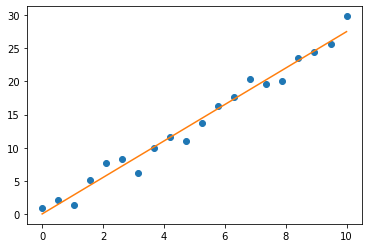

In [9]:
# generate some data with a linear relation + add some random noise
x = np.linspace(0, 10, 20)
y = 1 + x * 2.5 + np.random.normal(scale=2, size=20)

# get a and b
cov = np.cov(x, y, ddof=2) #np.cov() returns the covariance matrix 2x2
b_hat = cov[0, 1] / cov[0, 0] 
a_hat = np.mean(y - b_hat * x)

# get errors of a and b
n = len(x)
ssr = np.sum((y - (a_hat + b_hat * x))**2)
sigma_b = np.sqrt( (ssr/(n-2)) / np.sum((x - np.mean(x))**2) )
sigma_a = np.sqrt( sigma_b**2 * np.sum(x**2) / n )

print("fitted alpha = %.2f +- %.2f" % (a_hat, sigma_a))
print("fitted beta  = %.2f +- %.2f" % (b_hat, sigma_b))
print("Covariance matrix:\n", cov)

plt.plot(x, y, 'o')
plt.plot(x, a_hat + b_hat * x)
plt.show()

Notice that we didn't get exactly the correct answer: the points were generated with a slope of 2.5 and an intercept of 1, whereas our fit was a little bit off. But taking into account the uncertainties on the parameters, we can see that they are compatible with the initial values.

## Goodness of Fit

There are a several ways to asses whether the function chosen fits well the data. There are different ways to perform a "goodness of fit". Two common methods are:

#### The correlation coefficient

One viable and quick way is to just compute the SSR (*sum of the squared residuals*). However, the SSR has the downside that it depends on the unit of $y$. Therefore, it's a good idea to divide the SSR by the TSS (*total sum of squares*), which has the same unit, so the result is a pure number:

$$R^2 = 1 - \frac{\textrm{SSR}}{\textrm{TSS}} = 1 - \frac{\sum_i \left(\hat{y}_i - y\right)^2}{\sum_i \left(\bar{y} - y\right)^2}$$

This equation has the property that it is unitless, and it is $1$ when the fit is perfect, and $0$ when the fit does not describe the data at all. **In the case of linear regression, $R$ is the same as the correlation coefficient.**

In the case of the previous fit:

In [11]:
from math import sqrt
ssr = np.sum((y - a_hat - b_hat * x)**2)
tss = np.sum((np.mean(y) - y)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", sqrt(rsq))
print("Correlation matrix:\n", np.corrcoef(x,y)) # for linear fit, R=off-diagonl element of correlation matrix 


R2 = 0.9778512590117778 
R = 0.988863620026431
Correlation matrix:
 [[1.         0.98886362]
 [0.98886362 1.        ]]


#### The p-value

A proper goodness-of-fit test involves more than just some simple numerical estimator. The $\chi^2$ goodness of fit test is used to determine whether the sample data is consistent with a hypothesized distribution (in this case, a linear dependence, but it works for all data models). The $\chi^2$ goodness of fit test is appropriate when the data is randomly distributed, and the number of observations is not small, e.g. $\geq 5$.

In order to perform the test, we need to:

- determine the number of degrees of freedom of the fit, which is the number of data points - 1
- define the variable of the test, in this case the $\chi^2$:
$$\chi^2 = \sum_i \frac{(y_i - \hat{y}_i)^2}{\sigma_i^2}$$
where $\sigma_i$ is the *prior* uncertainty of single point
- determine the **p-value**, which is the probability of observing a sample statistic as extreme as the test statistic. The $\chi^2$ as test statistics is a good choice, because it has a known distribution given the number of degrees of freedom and under the assumption that the data is randomly distributed. Thus, the p-value is the integral of the $\chi^2$ from the value returned from the fit to $+\infty$. `scipy.stats` contains the pdf of $\chi^2$

**The procedure**
- Calcolare il $\chi^2$ del fit
- Integrare la pdf del $\chi^2$ dal valore ottenuto a $+\infty$ (o calcolare $1-CDF(\chi^2)$ ). Quest'area e il p-value: indica la probabilita di ottenere nel long run un valore di $\chi^2$ maggiore di quello ottenuto 

H0 incorrelazione, H1 correlazione. 

Quando p value<α siamo nella rejected region, rigettiamo null hypothesis, rigettiamo la correlazione (dati random)

Per pvalue>α accettiamo correlazione


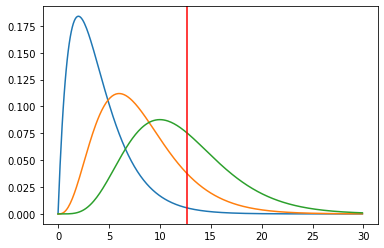

In [16]:
p = np.arange(0, 30, 0.1)
plt.plot(p, scipy.stats.chi2.pdf(p, df=4)) # very small p-value: model likely doesn't fit data
plt.plot(p, scipy.stats.chi2.pdf(p, df=8))
plt.plot(p, scipy.stats.chi2.pdf(p, df=12)) # very large p-value:
plt.axvline(12.7, color='r')

In our example, let's now assume (in order to use the $\chi^2$) that the data represents repeated counts, whose uncertainty is known from the Poisson pdf and are simply $\sigma_{y_i} = \sqrt{y_i}$:

<ErrorbarContainer object of 3 artists>

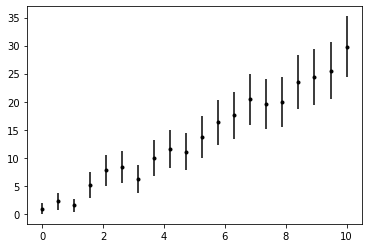

In [18]:
sigma_y = np.sqrt(np.abs(y))
plt.errorbar(x, y, yerr=sigma_y, fmt='.k')

n degrees of freedom = 19
chi2 = 11.111082122324289
p-value = 0.9200453258610093


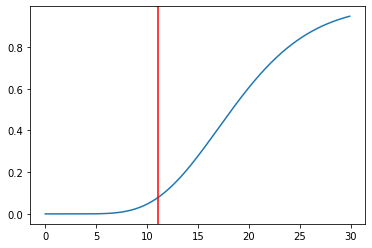

In [26]:
ndof = len(x) - 1
print("n degrees of freedom =", ndof)
chi2 = np.sum(((y - (a_hat + b_hat * x))**2) / sigma_y) # calculate the chi^2
print("chi2 =", chi2)
pvalue = 1. - scipy.stats.chi2.cdf(chi2, ndof) #area of left tail of chi2 distrib
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is not good

plt.plot(p, scipy.stats.chi2.cdf(p, df=ndof))
plt.fill_between(x, y, where=(x > chi2), color='lightblue')
plt.axvline(chi2, color='r')

## Curve Fitting

Unfortunately, not all datasets have a linear dependence like the ones we have seen before. Often, there is a more complicated function that needs to be fitted to the data. In these cases, you may:

1) apply an appropriate transform to the data to get back to the linear regression case (if applicable), or

2) perform a full fit with the desired function to the data

In this example, we will see how to do the latter. Be aware that there are more than one test statistics that can be chosen (it could be simply $\sum (\hat{y}_i - y_i)^2$, or the $\chi^2$, Likelihood, ...).

The best estimate of the function parameters are then determined through the numerical minimization of the test statistics.

Let's create some data, sampled from a sine distribution and affected by random noise:

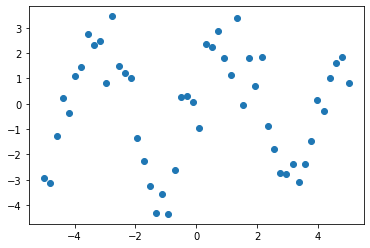

In [29]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50) #adding small noise

plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

This case is very straightfoward, because we *know* that the data is sampled from a sine function.

To find its parameters, in this case amplitude and (angular) frequency, we can call the `optimize.curve_fit()`, which accepts as arguments the fitting function, the data, and [much more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

In [38]:
def f(x, A, nu):
    return A * np.sin(nu * x) # model function

# fit by means of curve_fit
# p0 is a list of the initial guessed values for the parameters
params, params_covariance = optimize.curve_fit(f, x_data, y_data, p0=[2, 2], full_output=False) #add sigma if you have y errors
print("parameters:\n", params)
print("covariance matrix:\n", params_covariance)
print("A = %.2f +- %.2f" % (params[0], np.sqrt(params_covariance[0,0])))
print("f = %.2f +- %.2f" % (params[1], np.sqrt(params_covariance[1,1])))


parameters:
 [2.7415868 1.4854379]
covariance matrix:
 [[ 0.04030795 -0.00047415]
 [-0.00047415  0.00055123]]
A = 2.74 +- 0.20
f = 1.49 +- 0.02


Note: the way curve_fit determines the uncertainty is to actually renormalize the errors so that the reduced $\chi^2$ (that is, the $\chi^2$/number of degrees of freedom) value is one, so the magnitude of the errors doesn't matter, only the relative errors. In some cases, when you have a prior on your uncertainites, you can specify `absolute_sigma=True` and pass an appropriate array containing the uncertainties in order to preserve the original errors.

OSS: Per fit con errori in y, usare `absolute_sigma=True` e passare un array di errori in `sigma`

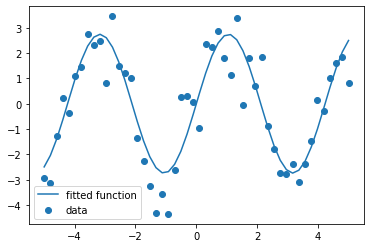

In [36]:
plt.scatter(x_data, y_data, label='data')
plt.plot(x_data, f(x_data, params[0], params[1]), label='fitted function')
plt.legend(loc='best')

## The Fisher F-test

Fitting is one of the crucial points of data analysis or in general data science. If you *know* the underlying model, then the overall problem is simple; if you don't, then it is a very delicate issue.

In some lucky cases, your data is distributed according to a known relation (a linear dependence on time, or the exponential decrease of a certain count) you can infer from your knowledge of the problem you are dealing with.

In all other cases, you don't know which function should be used for fitting, because you don't have the full knowledge of the underlying problem. In order to find a function, a common practice is to proceed by trial-and-error, although this poses several problems such that the choice of the function is arbitrary, and there is the risk to over/under-fit the data.

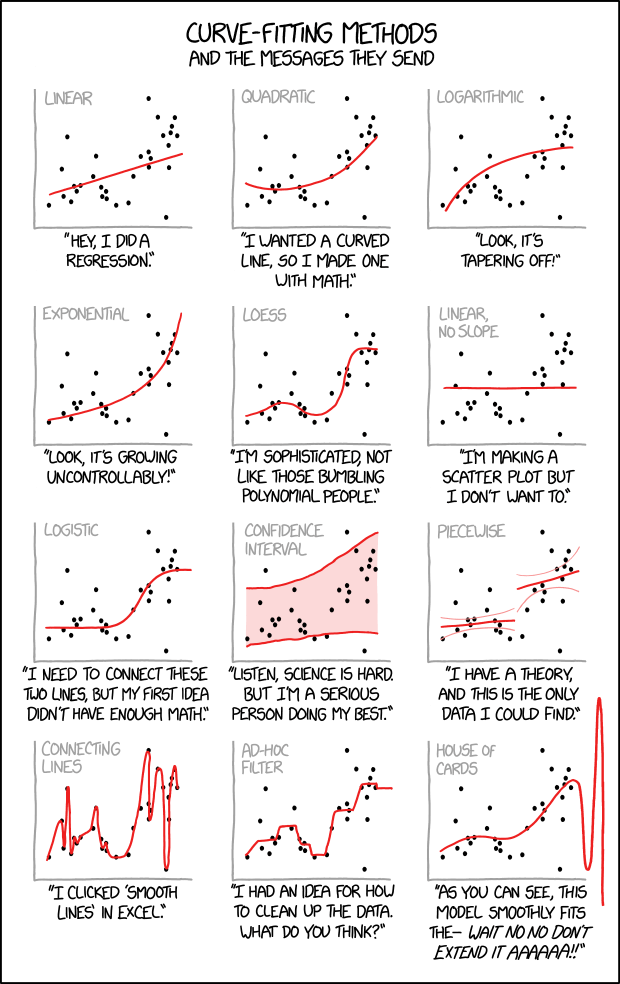

In [42]:
from IPython.display import Image
Image(filename = 'xkcd_curve_fitting.png') 

The method called **Fisher F-test** [[1](http://EconPapers.repec.org/RePEc:bla:istatr:v:80:y:2012:i:3:p:491-491)] [[2](https://doi.org/10.2307/2340521)] can help to determine the correct number of parameters in an appropriate family of functions (e.g. polynomials, exponentials, ...). From the statistical point of view, this method is not trivial at all because you need a prior on the choice of the function.

Please note that if you don't even have the knowledge of which family of functions to be used to fit the data, then the problem is more complex and the F-test is not applicable.

Instead, if you have a prior on the family of the function but not the exact number of parameters, the Fisher F-test provides an useful recipe.

The F-test is based on some fit quantities, such as the RSS (squared sum of the residuals of the fit) and the number of degrees of freedom. The test uses these quantities to iteratively compare one reference function and the function with one more parameter to determine whether or not the additional parameter is needed. If the simpler fit function is correct, the relative increase in the sum of squares is expected to be smaller than the relative increase in DOF:

$$\frac{SSR_1 - SSR_2}{SSR_2} \lesssim \frac{n_1 - n_2}{n_2}$$

the F-test is based on the test statistics that is defined as follows:

$$F = \left( \frac{SSR_1 - SSR_2}{n_2 - n_1} \right) / \left( \frac{SSR_2}{N - n_2} \right)$$

The F value is used to determine a CL after integrating the Fisher distribution from $F$ to $+\infty$, with $N$ the number of total degrees of freedom (bins):

$$CL = 1 - \int_0^F \mathcal{F} d\mathcal{f}$$

which gives the CL under the null hypothesis of the simpler function being sufficient. If $CL < 10\%$, the simpler function is sufficient, otherwise, more parameters are needed. In the latter case, the Fisher test is repeated by increasing the number of parameters of both functions, until a function with a sufficient number of parameters is found.

QUINDI

Se il CL e >0.1 l'aumento dei parametri non e compensato da una significativa diminuzione del SSR, percio teniamo la funzione piu semplice.

* CL < 0.1 => piu parametri, CL>0.1 => funzione base


SSR: 422.70819885966455 111.02398479334965 110.87610099868911
Test Linear vs Quadratic:
CL: 0.000 , additional parameter necessary: YES
Test Quadratic vs Cubic:
CL: 0.720 , additional parameter necessary: NO


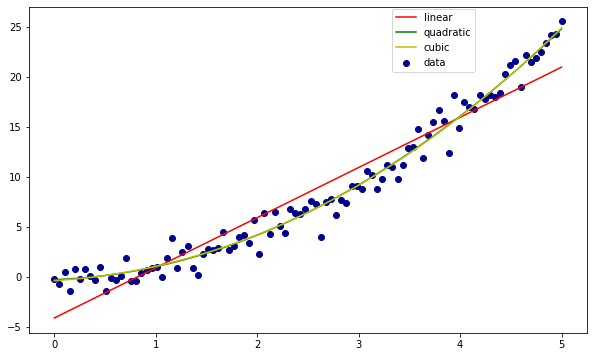

In [51]:
from scipy.stats import f


# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


# data generation and plot
N = 100
x = np.linspace(0, 5., N)
y = x**2 + np.random.normal(size=(N))
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, marker='o', c='darkblue', label="data")

# possible fitting functions
def f1(x, a0, a1):
    return a0 + a1 * x

def f2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def f3(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

# Fitting and getting SSRs
(fa0, fa1), cov = optimize.curve_fit(f1, x, y)
y1 = f1(x, fa0, fa1)
ax.plot(x, y1, color='r', label="linear")
ssr_1 = np.sum((y1 - y)**2)

(fa0, fa1, fa2), cov = optimize.curve_fit(f2, x, y)
y2 = f2(x, fa0, fa1, fa2)
ax.plot(x, y2, color='g', label="quadratic")
ssr_2 = np.sum((y2 - y)**2)

(fa0, fa1, fa2, fa3), cov = optimize.curve_fit(f3, x, y)
y3 = f3(x, fa0, fa1, fa2, fa3)
ax.plot(x, y3, color='y', label="cubic")
ssr_3 = np.sum((y3 - y)**2)

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2, ssr_3)

# run F-test
# test f2 vs f1
print("Test Linear vs Quadratic:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, 1, 2, N, verbose=True)

print("Test Quadratic vs Cubic:")
cl_2_vs_3 = Ftest(ssr_2, ssr_3, 2, 3, N, verbose=True)